In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle

## load data

In [10]:
path= "./data/"
train_file_0= os.listdir(path+"0_train")
test_file_0= os.listdir(path+ "0_test")
train_file_1= os.listdir(path+"1_train")
test_file_1= os.listdir(path+ "1_test")

## set train data

In [11]:
X_train= 0
check= False

for file in train_file_0:
    img_data= image.load_img(path+"0_train/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)

    if(check== False):
        X_train= img
        check= True
    else:
        X_train= np.vstack((X_train, img))

for file in train_file_1:
    img_data= image.load_img(path+ "1_train/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_train= np.vstack((X_train, img))

In [12]:
y_train= np.array([0]* len(train_file_0))
y_train_1= np.array([1]* len(train_file_1))
y_train= np.append(y_train, y_train_1)

In [13]:
print(X_train.shape)
print(y_train.shape)

(1382, 60, 60, 3)
(1382,)


## set test data

In [14]:
X_test= 0
check= False

for file in test_file_0:
    img_data= image.load_img(path+"0_test/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))
        
for file in test_file_1:
    img_data= image.load_img(path+ "1_test/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_test= np.vstack((X_test, img))

In [15]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [16]:
print(X_test.shape)
print(y_test.shape)

(200, 60, 60, 3)
(200,)


In [17]:
X_train, y_train= shuffle(X_train, y_train, random_state= 42)
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

## save data

In [19]:
np.save("./dataset/X_train", X_train)
np.save("./dataset/y_train", y_train)
np.save("./dataset/X_test", X_test)
np.save("./dataset/y_test", y_test)

## load data

In [22]:
X_train= np.load("./dataset/X_train.npy")
y_train= np.load("./dataset/y_train.npy")
X_test= np.load("./dataset/X_test.npy")
y_test= np.load("./dataset/y_test.npy")

## build model

In [23]:
model= keras.models.Sequential()

In [24]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [60, 60, 3]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))

In [25]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 128)       131200    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       524544    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       1

## train

In [27]:
history= model.fit(X_train, y_train, epochs= 30)

Epoch 1/30
44/44 [==============================] - 25s 559ms/step - loss: 0.6904 - accuracy: 0.5224
Epoch 2/30
44/44 [==============================] - 25s 573ms/step - loss: 0.6892 - accuracy: 0.5355
Epoch 3/30
44/44 [==============================] - 26s 596ms/step - loss: 0.6863 - accuracy: 0.5441
Epoch 4/30
44/44 [==============================] - 24s 547ms/step - loss: 0.6786 - accuracy: 0.5695
Epoch 5/30
44/44 [==============================] - 24s 547ms/step - loss: 0.6746 - accuracy: 0.5767
Epoch 6/30
44/44 [==============================] - 24s 545ms/step - loss: 0.6662 - accuracy: 0.6122
Epoch 7/30
44/44 [==============================] - 24s 546ms/step - loss: 0.6563 - accuracy: 0.6288
Epoch 8/30
44/44 [==============================] - 24s 546ms/step - loss: 0.6370 - accuracy: 0.6397
Epoch 9/30
44/44 [==============================] - 24s 544ms/step - loss: 0.6383 - accuracy: 0.6606
Epoch 10/30
44/44 [==============================] - 24s 547ms/step - loss: 0.6149 - accura

## check loss and accuracy

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

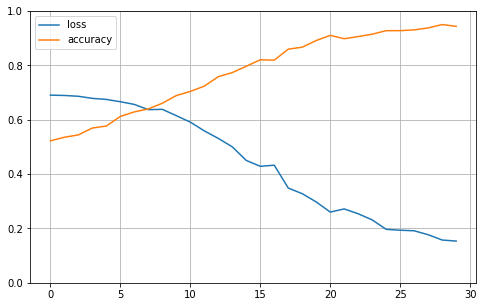

In [29]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## use test data

In [30]:
y_pred= model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [31]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

## check accuracy

In [33]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_test))

accuracy:  0.95
